In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from learnML.classification import LinearSVC

In [3]:
data = pd.read_csv("data/svm_data.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [4]:
X

array([[  6.68873898,  -2.44840134],
       [ -1.1004791 ,  -7.78436803],
       [  3.99337867,  -4.90451269],
       [ -1.8171622 ,  -9.22909875],
       [ -2.05521901, -10.23141199],
       [  4.20397723,  -3.61164749],
       [ -0.21804625,  -9.21962706],
       [  5.19327641,  -6.38845134],
       [ -1.83682056,  -8.21952131],
       [  7.54287406,  -5.35284052],
       [  4.88954545,  -3.38947816],
       [ -1.76558632,  -9.34943001],
       [  5.22597752,  -5.5503347 ],
       [  6.64886376,  -4.46203664],
       [  8.09408178,  -4.8068287 ],
       [  6.32916529,  -5.32177094],
       [  5.80670214,  -5.14475233],
       [  5.67381136,  -3.33963413],
       [  7.20870152,  -6.04176429],
       [ -3.25014567,  -8.67304842],
       [ -1.22856371,  -7.96317275],
       [ -3.29446134,  -7.45269997],
       [ -1.81294631,  -7.55640734],
       [ -1.53809058,  -8.77828137],
       [ -3.78288052,  -9.38303174],
       [ -2.73473836,  -9.34777956],
       [  0.56085542,  -8.37942864],
 

In [5]:
y

array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.])

In [6]:
model = LinearSVC(
    learning_rate=0.001,
    lambda_=0.01,
    n_iterations=10000,
)

model.fit(X, y)

Iteration:      0 | Cost: 9.806735e-01
Iteration:   1000 | Cost: 1.358883e-02
Iteration:   2000 | Cost: 9.988443e-03
Iteration:   3000 | Cost: 8.269578e-03
Iteration:   4000 | Cost: 6.614329e-03
Iteration:   5000 | Cost: 5.023962e-03
Iteration:   6000 | Cost: 3.884576e-03
Iteration:   7000 | Cost: 3.884397e-03
Iteration:   8000 | Cost: 3.884316e-03
Iteration:   9000 | Cost: 3.873387e-03
Iteration:  10000 | Cost: 3.869704e-03


In [7]:
print("Weights: ", model.get_weights())
print("Intercept: ", model.get_intercept())

Weights:  [0.59884404 0.16839301]
Intercept:  -0.07512244897958675


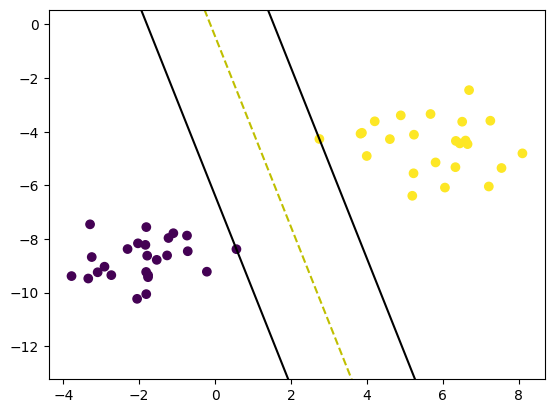

In [8]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    weights = model.get_weights()
    intercept = model.get_intercept()

    x1_1 = get_hyperplane_value(x0_1, weights, intercept, 0)
    x1_2 = get_hyperplane_value(x0_2, weights, intercept, 0)

    x1_1_m = get_hyperplane_value(x0_1, weights, intercept, -1)
    x1_2_m = get_hyperplane_value(x0_2, weights, intercept, -1)

    x1_1_p = get_hyperplane_value(x0_1, weights, intercept, 1)
    x1_2_p = get_hyperplane_value(x0_2, weights, intercept, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


visualize_svm()